In [1]:
import pandas as pd

In [2]:
import datetime

In [10]:
df_bus = pd.read_csv("""/Users/cherukuri/Desktop/Search/yelp_ds/dataset/business.csv""")
df_bus.head()

,attributes.Ambience.divey,attributes.RestaurantsDelivery,attributes.DogsAllowed,postal_code,hours.Thursday,attributes.HairSpecializesIn.coloring,attributes.BestNights.sunday,attributes.BYOB,attributes.AgesAllowed,attributes.Music.video,...,attributes.Caters,attributes.RestaurantsReservations,attributes.DietaryRestrictions.dairy-free,attributes.DietaryRestrictions.vegan,attributes.Ambience.romantic,attributes.Music.jukebox,attributes.Ambience.upscale,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating
0,NaN,NaN,NaN,44143,10:00-21:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
1,False,True,NaN,28215,10:00-22:00,NaN,NaN,NaN,NaN,NaN,...,NaN,False,NaN,NaN,False,NaN,False,True,NaN,False
2,NaN,NaN,NaN,M4K 1N7,10:00-19:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
3,NaN,NaN,NaN,85258,9:00-17:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,False,NaN,85016,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,NaN,NaN,False,NaN,False,True,True,False


In [11]:
from __future__ import print_function
from collections import Counter
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data_dir = "/Users/cherukuri/Desktop/Search/yelp_ds/dataset"

In [13]:
import json, os
users = []
with open(os.path.join(data_dir, 'user.json')) as f:
    for line in f:
        users.append(json.loads(line))
print("Read {count} users".format(count=len(users)))

Read 1183362 users


In [14]:
reviews = []
with open(os.path.join(data_dir, 'review.json')) as f:
    for line in f:
        reviews.append(json.loads(line))
print("Read {count} reviews".format(count=len(reviews)))

Read 4736897 reviews


In [15]:
businesses = []
with open(os.path.join(data_dir, 'business.json')) as f:
    for line in f:
        businesses.append(json.loads(line))
print("Read {count} businesses".format(count=len(businesses)))

Read 156639 businesses


In [18]:
friend_counts = []
for user in users:
    friend_counts.append(len(user["friends"]))
print("Counted {count} friend relationships".format(count=sum(friend_counts)))

Counted 39846890 friend relationships


In [ ]:
def summary(data):
    print("n    = {n}\n"
          "mean = {mean}\n"
          "sd   = {sd}\n"
          "min  = {min}\n"
          "10%  = {p10}\n"
          "25%  = {p25}\n"
          "50%  = {p50}\n"
          "75%  = {p75}\n"
          "90%  = {p90}\n"
          "max  = {max}".format(
            n=len(data),
            min=min(data),
            p10=np.percentile(data, 10),
            p25=np.percentile(data, 25),
            p50=np.percentile(data, 50),
            p75=np.percentile(data, 75),
            p90=np.percentile(data, 90),
            mean=np.mean(data),
            sd=np.std(data),
            max=max(data)))

In [38]:
user_review_count = {}
for review in reviews:
    user_id = review["user_id"]
    if user_id in user_review_count:
        user_review_count[user_id] += 1
    else:
        user_review_count[user_id] = 1
summary(user_review_count.values())

n    = 1183362
mean = 4.00291457728
sd   = 13.845164729
min  = 1
10%  = 1.0
25%  = 1.0
50%  = 1.0
75%  = 3.0
90%  = 7.0
max  = 3442


In [36]:
summary([user['review_count'] for user in users])

n    = 1183362
mean = 23.7268604197
sd   = 80.5064183211
min  = 0
10%  = 1.0
25%  = 2.0
50%  = 5.0
75%  = 16.0
90%  = 48.0
max  = 11656


In [26]:
sum([user['review_count'] for user in users])

28077465

In [27]:
sum(user_review_count.values())

4736897

In [28]:
len([user['user_id'] for user in users if user_review_count[user['user_id']] > user['review_count']])

1319

p= (1552109.0592496276, -1.2661929196125798)


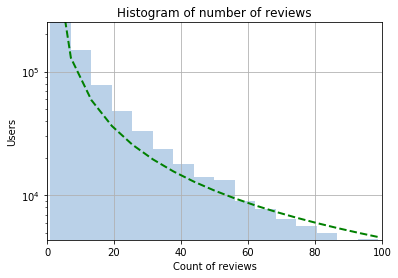

In [37]:
review_counts = [user['review_count'] for user in users if user['review_count']>0 and user['review_count']<100]
y, bins, patches = plt.hist(review_counts, 16, log=True, facecolor='#6699cc', alpha=0.45)

p = fit_to_powerlaw(bins[:-1], y)
print("p=",p)
plt.plot(bins, powerlaw(p, bins), 'g--', lw=2)

plt.xlabel('Count of reviews')
plt.ylabel('Users')
plt.title('Histogram of number of reviews')
plt.grid(True)
plt.axis([0, 100, 0, 250000])
plt.show()

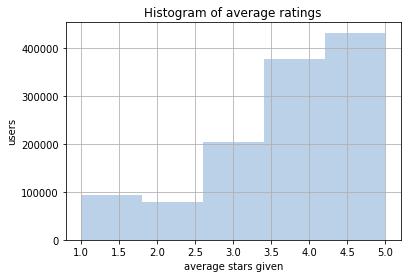

In [30]:
average_stars = [user['average_stars'] for user in users]
y, bins, patches = plt.hist(average_stars, 5, facecolor='#6699cc', alpha=0.45)

plt.xlabel('average stars given')
plt.ylabel('users')
plt.title('Histogram of average ratings')
plt.grid(True)
#plt.axis([0, 100, 0, 250000])
plt.show()

In [74]:
friend_counts = []
for user in users:
    friend_counts.append(len(user["friends"]))
print("Counted {count} friend relationships".format(count=sum(friend_counts)))

Counted 79693780 friend relationships


In [75]:
print("Fraction of users with no defined friends: %0.3f" % 
      (len([c for c in friend_counts if c==0]) / float(len(friend_counts))))

Fraction of users with no defined friends: 0.429


In [77]:
nonzero_friend_counts = [c for c in friend_counts if c>0]

In [78]:
def summary(data):
    print("n    = {n}\n"
          "mean = {mean}\n"
          "sd   = {sd}\n"
          "min  = {min}\n"
          "10%  = {p10}\n"
          "25%  = {p25}\n"
          "50%  = {p50}\n"
          "75%  = {p75}\n"
          "90%  = {p90}\n"
          "max  = {max}".format(
            n=len(data),
            min=min(data),
            p10=np.percentile(data, 10),
            p25=np.percentile(data, 25),
            p50=np.percentile(data, 50),
            p75=np.percentile(data, 75),
            p90=np.percentile(data, 90),
            mean=np.mean(data),
            sd=np.std(data),
            max=max(data)))
summary(nonzero_friend_counts)

n    = 1350822
mean = 58.9965073118
sd   = 159.506739486
min  = 1
10%  = 1.0
25%  = 4.0
50%  = 18.0
75%  = 59.0
90%  = 143.0
max  = 14995


In [79]:
def powerlaw(p, x):
    return p[0] * (x**p[1])

def fitfunc(p,x):
    return p[0] + p[1] * x 

def errfunc(p, x, y):
    return (y - fitfunc(p, x))/ (fitfunc(p, x)+1)

def fit_to_powerlaw(xs,ys):
    logx = np.log10(np.maximum(np.ones(len(xs)),xs))
    logy = np.log10(np.maximum(np.ones(len(ys)),ys))
    pinit = [max(ys), -1.0]
    out = optimize.leastsq(errfunc, pinit, args=(logx, logy), full_output=1)
    pfinal = out[0]
    index = pfinal[1]
    amp = 10.0**pfinal[0]
    return (amp, index)

p= (15235666642401.475, -3.1542427974066873)


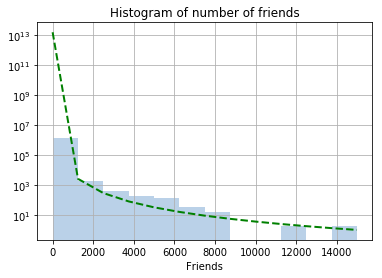

In [80]:

y, bins, patches = plt.hist(nonzero_friend_counts, 12, log=True, facecolor='#6699cc', alpha=0.45)

p = fit_to_powerlaw(bins[:-1], y)
print("p=",p)
plt.plot(bins, powerlaw(p, bins), 'g--', lw=2)

plt.xlabel('Friends')
plt.title('Histogram of number of friends')
plt.grid(True)
plt.show()

In [33]:
df_bus = pd.read_csv("""/Users/cherukuri/Desktop/Search/yelp_ds/dataset/review.csv""")
df_bus.head()

,funny,user_id,review_id,text,business_id,stars,date,useful,cool
0,0,cjpdDjZyprfyDG3RlkVG3w,VfBHSwC5Vz_pbFluy07i9Q,My girlfriend and I stayed here for 3 nights a...,uYHaNptLzDLoV_JZ_MuzUA,5,2016-07-12,0,0
1,0,bjTcT8Ty4cJZhEOEo01FGA,3zRpneRKDsOPq92tq7ybAA,If you need an inexpensive place to stay for a...,uYHaNptLzDLoV_JZ_MuzUA,3,2016-10-02,0,0
2,0,AXgRULmWcME7J6Ix3I--ww,ne5WhI1jUFOcRn-b-gAzHA,Mittlerweile gibt es in Edinburgh zwei Ableger...,uYHaNptLzDLoV_JZ_MuzUA,3,2015-09-17,0,0
3,0,oU2SSOmsp_A8JYI7Z2JJ5w,llmdwOgDReucVoWEry61Lw,Location is everything and this hotel has it! ...,uYHaNptLzDLoV_JZ_MuzUA,4,2016-08-21,0,0
4,0,0xtbPEna2Kei11vsU-U2Mw,DuffS87NaSMDmIfluvT83g,gute lage im stadtzentrum. shoppingmeile und s...,uYHaNptLzDLoV_JZ_MuzUA,5,2013-11-20,0,0


In [44]:
df_bus = pd.read_csv("""/Users/cherukuri/Desktop/Search/yelp_ds/dataset/business.csv""")
df_bus.head()

,attributes.Ambience.divey,attributes.RestaurantsDelivery,attributes.DogsAllowed,postal_code,hours.Thursday,attributes.HairSpecializesIn.coloring,attributes.BestNights.sunday,attributes.BYOB,attributes.AgesAllowed,attributes.Music.video,...,attributes.Caters,attributes.RestaurantsReservations,attributes.DietaryRestrictions.dairy-free,attributes.DietaryRestrictions.vegan,attributes.Ambience.romantic,attributes.Music.jukebox,attributes.Ambience.upscale,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating
0,NaN,NaN,NaN,44143,10:00-21:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
1,False,True,NaN,28215,10:00-22:00,NaN,NaN,NaN,NaN,NaN,...,NaN,False,NaN,NaN,False,NaN,False,True,NaN,False
2,NaN,NaN,NaN,M4K 1N7,10:00-19:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
3,NaN,NaN,NaN,85258,9:00-17:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,False,NaN,85016,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,NaN,NaN,False,NaN,False,True,True,False


In [49]:
main_path = """/Users/cherukuri/Desktop/Search/yelp_ds/dataset/"""


In [50]:
df_bus = pd.read_csv(main_path+"business.csv")
df_bus.shape

(156639, 101)

In [54]:
df_rev = pd.read_csv(main_path+"review.csv")
df_rev.shape

(4736897, 9)

In [55]:
df_all = pd.merge(df_rev, df_bus, on = ['business_id'], how='outer')
df_all.shape

(4736898, 109)

In [56]:
df_all.head()

,funny,user_id,review_id,text,business_id,stars_x,date,useful,cool,attributes.Ambience.divey,...,attributes.Caters,attributes.RestaurantsReservations,attributes.DietaryRestrictions.dairy-free,attributes.DietaryRestrictions.vegan,attributes.Ambience.romantic,attributes.Music.jukebox,attributes.Ambience.upscale,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating
0,0.0,cjpdDjZyprfyDG3RlkVG3w,VfBHSwC5Vz_pbFluy07i9Q,My girlfriend and I stayed here for 3 nights a...,uYHaNptLzDLoV_JZ_MuzUA,5.0,2016-07-12,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,bjTcT8Ty4cJZhEOEo01FGA,3zRpneRKDsOPq92tq7ybAA,If you need an inexpensive place to stay for a...,uYHaNptLzDLoV_JZ_MuzUA,3.0,2016-10-02,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,AXgRULmWcME7J6Ix3I--ww,ne5WhI1jUFOcRn-b-gAzHA,Mittlerweile gibt es in Edinburgh zwei Ableger...,uYHaNptLzDLoV_JZ_MuzUA,3.0,2015-09-17,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,oU2SSOmsp_A8JYI7Z2JJ5w,llmdwOgDReucVoWEry61Lw,Location is everything and this hotel has it! ...,uYHaNptLzDLoV_JZ_MuzUA,4.0,2016-08-21,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0xtbPEna2Kei11vsU-U2Mw,DuffS87NaSMDmIfluvT83g,gute lage im stadtzentrum. shoppingmeile und s...,uYHaNptLzDLoV_JZ_MuzUA,5.0,2013-11-20,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


p= (774552697.51753604, -2.2153462668905424)


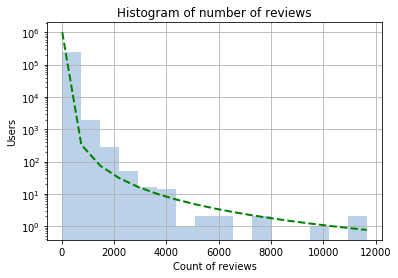

In [64]:
review_counts = [user['review_count'] for user in users if user['review_count']>=20]
y, bins, patches = plt.hist(review_counts, 16, log=True, facecolor='#6699cc', alpha=0.45)

p = fit_to_powerlaw(bins[:-1], y)
print("p=",p)
plt.plot(bins, powerlaw(p, bins), 'g--', lw=2)

plt.xlabel('Count of reviews')
plt.ylabel('Users')
plt.title('Histogram of number of reviews')
plt.grid(True)
#plt.axis([0, 100, 0, 250000])
plt.show()

In [66]:
df_rev = pd.read_csv(main_path+"review.csv")
df_rev.shape

(4736897, 9)

In [73]:
df_rev[df_rev['text'].str.contains("restaurant")]['text']

47         Went in for lunch with a coworker today. The s...
105        We've eaten here 2-3 times a month for the las...
136        for the time being, for all its worth, i am go...
156        Considering the amount of rave reviews on here...
161        I came here with my sisters for brunch on a Su...
164        Literally my FAVORITE new restaurant in the no...
171        Love this restaurant!!! Awesome brunch, $10 fo...
175        I wish I could share Avitania B.'s Groupon ent...
178        Is the food at Table 17 excellent? Yes.\n\nIs ...
179        Brunchy time and we have a winner.  To start, ...
185        I went here for the brunch the other day in th...
187        "Table 17 is the rare restaurant that's both a...
194        Had brunch again at Table 17 for a third time ...
196        The only downside about this place is that som...
203        I can't seem to make the half star symbol work...
204        Table 17 is a truly awesome restaurant and wor...
208        I am a fairly

In [71]:
match_list = ['breafast','lunch','dinner','brunch','happy hour']
match_str = "|".join(match_list)
df_rev = df_rev[df_rev['text'].str.contains(match_str)]
print(df_rev.shape, df_rev.shape)

(640837, 9) (640837, 9)
